#### Tarea5 Proyecto de análisis de datos
#### **Sergio Aldana Gomez**
#### Grupo: 202016908_72
#### Tutor: Handry Orozco
#### Universidad Nacional Abierta y a Distancia
#### Escuela de ciencias Básicas tecnología e Ingeniería
#### Curso: Análisis de datoss

#### Modelo a usar: **Regresión Logistica**

In [1]:
# Importar librerias
import pandas as pd
import numpy as np

#### Importar dataset 

In [38]:

data = pd.read_csv("Titanic-Dataset.csv")
#leer los datos
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Análisis Exploratorio de Datos

In [27]:
# Visualizar las estadisticas de las variables
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,0.352413,2.232906e-16,0.523008,0.381594,3.987333e-18
std,257.353842,0.486592,0.836071,0.477990,1.000562e+00,1.102743,0.806057,1.000562e+00
min,1.000000,0.000000,1.000000,0.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,0.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,0.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,1.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,1.000000,3.870872e+00,8.000000,6.000000,9.667167e+00


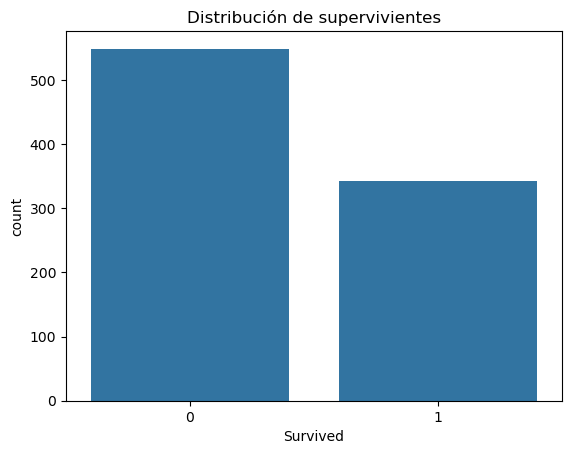

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la distribución de los datos de la variable Survived
sns.countplot(x='Survived', data=data)
plt.title('Distribución de supervivientes')
plt.show()

La cantidad de individuos que no sobrevivieron es significativamente mayor que la cantidad de aquellos que sí lo hicieron. Existe un desbalance en las clases de la variable "Survived", lo que podría tener implicaciones en el análisis de modelos predictivos si esta variable fuera la variable objetivo.

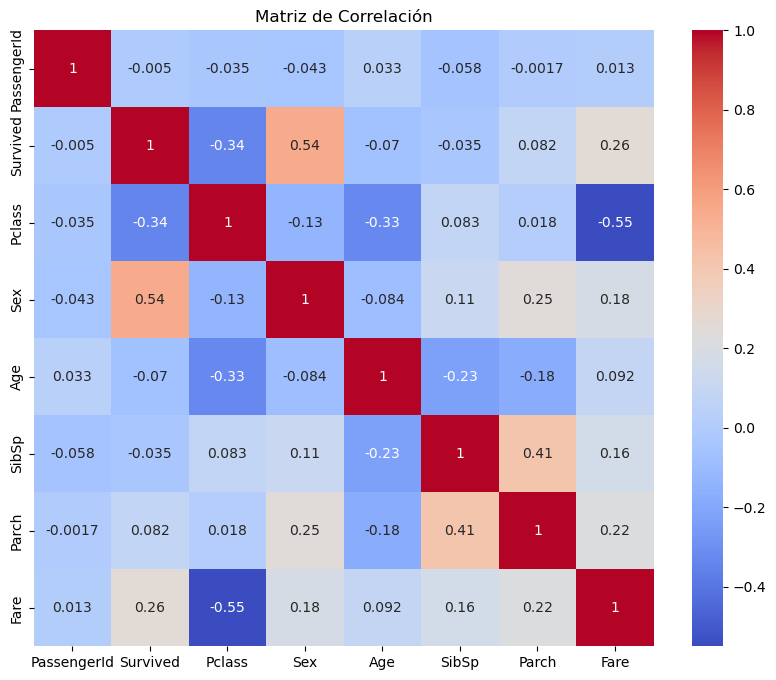

In [34]:
# Seleccionamos solo las columnas numéricas
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación solo para las columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

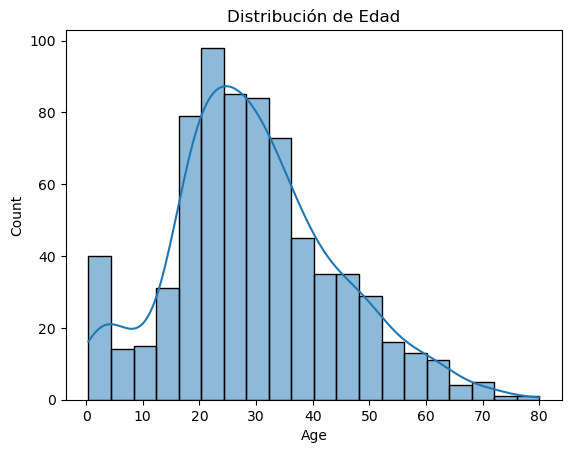

In [40]:
# Ver distribuciones de variables numéricas
sns.histplot(data['Age'].dropna(), kde=True)
plt.title('Distribución de Edad')
plt.show()

#### Procesar los datos
Incluye manejar valores faltantes, codificar variables categóricas y estandarizar o normalizar las variables según sea necesario.

In [17]:
# Tratamiento de valores faltantes
data['Age'] = data['Age'].fillna(data['Age'].mean())  # Rellenar con la media
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Rellenar con la moda

In [19]:
# Codificar las variables categóricas
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [21]:
# Normalización de las variables numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [57]:
# Ver el resultado del preprocesamiento
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Selección de características
Aquí se identifican las variables más relevantes para entrenar el modelo. Se usa técnicas de selección de características como SelectKBest.

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Codificar las columnas categóricas
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)

# Seleccionar las 5 mejores características
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

In [63]:
# Ver las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare'], dtype='object')


#### División de Datos en Train y Test
Dividimos el conjunto de datos en entrenamiento y prueba para evaluar el modelo

In [65]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
print("El dataset ha sido dividido")

El dataset ha sido dividido


#### Entrenamiento del Modelo
En este paso entrenamos el modelo de Regresión Logística y se ajustan los hiperparámetros

In [70]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression()

####  Evaluación del Desempeño del Modelo
Evaluamos el modelo utilizando métricas como precisión, recall, F1-score, etc.

In [76]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predecir en el conjunto de test
y_pred = model.predict(X_test)

In [78]:
# Evaluar el desempeño
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.77
Recall: 0.62
Precision: 0.78
F1-Score: 0.69


#### Visualización de los Resultados
Usaremos matrices de confusión y curvas ROC para visualizar el desempeño del modelo.

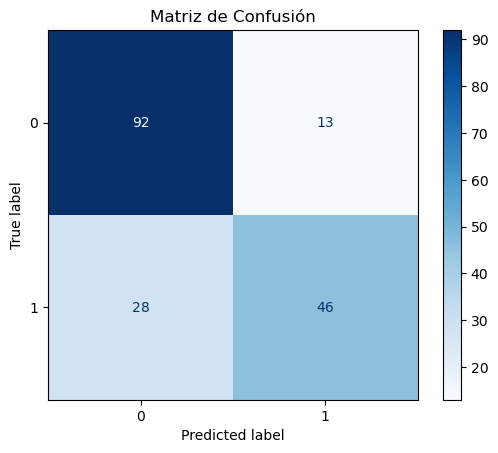

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

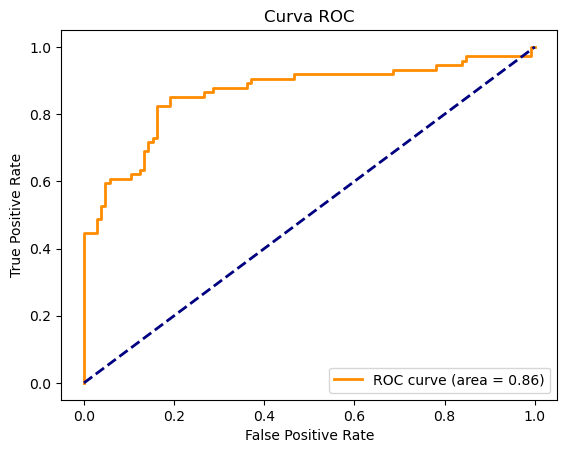

In [83]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

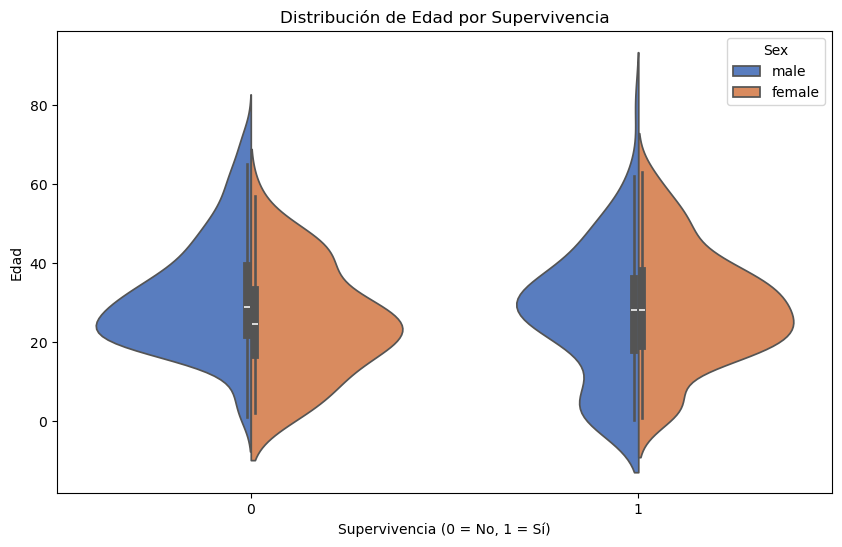

In [103]:
# Distribución de edades por supervivencia
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', hue='Sex', data=data, split=True, palette='muted')
plt.title('Distribución de Edad por Supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.show()

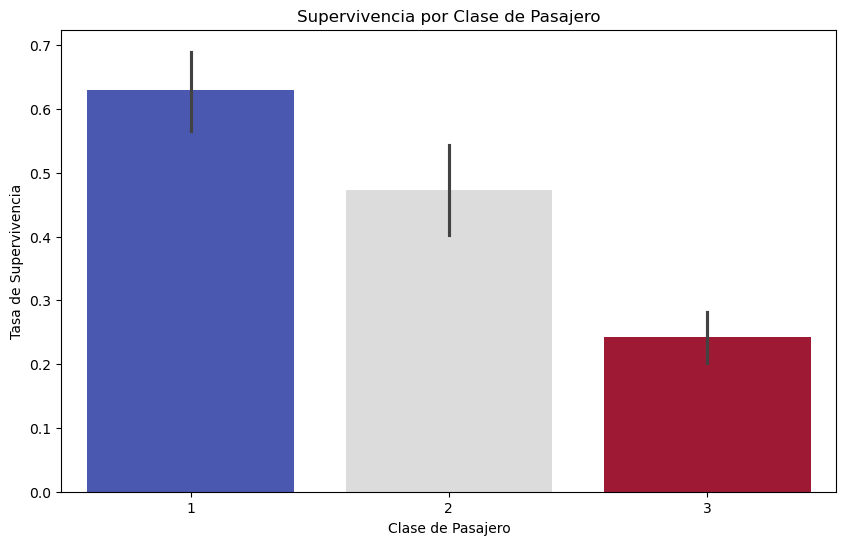

In [99]:
# Supervivencia según la clase del pasajero
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=data, hue='Pclass', palette='coolwarm', dodge=False, legend=False)
plt.title('Supervivencia por Clase de Pasajero')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Tasa de Supervivencia')
plt.show()

#### Interpretación, Análisis y Documentación

Análisis de resultados: Después de obtener los resultados, se pueden interpretar las métricas para ver cómo se comporta el modelo en términos de precisión, recall y F1-score.
Reflexiones: Identificar las características que tienen mayor impacto en la predicción de la supervivencia.
Mejoras potenciales: Explorar otros modelos o ajustar los hiperparámetros para mejorar el desempeño.